In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Series=index(标号)+values(是一个numpy array)
s1=pd.Series([1,2,3,4,np.nan,5,6,7]) 
s1

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    5.0
6    6.0
7    7.0
dtype: float64

In [5]:
s1.values

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [6]:
s1.index

RangeIndex(start=0, stop=8, step=1)

In [8]:
s2=pd.Series([21,23,42,21,23],index=['Jack','Lucy','Helen','Milky','Jasper'])
s2

Jack      21
Lucy      23
Helen     42
Milky     21
Jasper    23
dtype: int64

In [9]:
s2['Jack']

21

In [10]:
s2.loc['Jack']

21

In [11]:
s2.iloc[0] #iloc代表的是位置

21

In [13]:
print(s2.shape)
print(s2.size)

(5,)
5


In [14]:
s2.head(2)

Jack    21
Lucy    23
dtype: int64

In [16]:
s2.describe() #可以看他的均值，标准差等数

count     5.0
mean     26.0
std       9.0
min      21.0
25%      21.0
50%      23.0
75%      23.0
max      42.0
dtype: float64

In [17]:
s2.sort_values() #对数值排序

Jack      21
Milky     21
Lucy      23
Jasper    23
Helen     42
dtype: int64

In [18]:
s2[s2>22]

Lucy      23
Helen     42
Jasper    23
dtype: int64

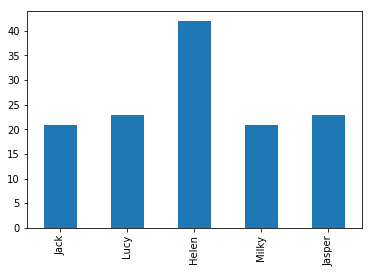

In [21]:
s2.plot.bar()

In [22]:
'Lucy' in s2

True

In [24]:
#可以把s2变成字典形式
s2_dirt=s2.to_dict() 
s2_dirt

{'Jack': 21, 'Lucy': 23, 'Helen': 42, 'Milky': 21, 'Jasper': 23}

In [27]:
s2_series=pd.Series(s2_dirt)
s2_series

Jack      21
Lucy      23
Helen     42
Milky     21
Jasper    23
dtype: int64

In [30]:
name = ['Jack','Lucy','Helen','Milky','Tom','Jasper','Helen']
s2_new=pd.Series(s2_dirt,index=name)
s2_new

Jack      21.0
Lucy      23.0
Helen     42.0
Milky     21.0
Tom        NaN
Jasper    23.0
Helen     42.0
dtype: float64

In [31]:
## drop the duplicate in value
s2_new.drop_duplicates()

Jack     21.0
Lucy     23.0
Helen    42.0
Tom       NaN
dtype: float64

In [32]:
#看s2_new是不是一个空值
pd.isnull(s2_new)

Jack      False
Lucy      False
Helen     False
Milky     False
Tom        True
Jasper    False
Helen     False
dtype: bool

### DataFrame

#### How to create one?

In [34]:
df=pd.DataFrame({'Student_1':[90,100,95],'Student_2':[60,80,100]},index=['Monday', 'Wednesday', 'Friday'])
df

,Student_1,Student_2
Monday,90,60
Wednesday,100,80
Friday,95,100


In [36]:
df1=pd.DataFrame([[1,2,3],[4,5,6]],index=['A','B'],columns=['C1','C2','C3'])
df1

,C1,C2,C3
A,1,2,3
B,4,5,6


In [37]:
df1.values

array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
df1.index

Index(['A', 'B'], dtype='object')

In [39]:
df1.columns

Index(['C1', 'C2', 'C3'], dtype='object')

In [40]:
df1.T

,A,B
C1,1,4
C2,2,5
C3,3,6


In [41]:
df1.shape

(2, 3)

In [42]:
df1.size

6

#### Method

In [44]:
df1.head(1)

,C1,C2,C3
A,1,2,3


In [45]:
df1.tail(1)

,C1,C2,C3
B,4,5,6


In [46]:
df1.describe()

,C1,C2,C3
count,2.00000,2.00000,2.00000
mean,2.50000,3.50000,4.50000
std,2.12132,2.12132,2.12132
min,1.00000,2.00000,3.00000
25%,1.75000,2.75000,3.75000
50%,2.50000,3.50000,4.50000
75%,3.25000,4.25000,5.25000
max,4.00000,5.00000,6.00000


In [48]:
df1.loc['B']

C1    4
C2    5
C3    6
Name: B, dtype: int64

In [53]:
df1.loc['B'].loc['C2']

5

In [51]:
df1.loc['B','C2']

5

In [52]:
df1.iloc[1,1]

5

In [54]:
df1['C2'].loc['B']

5

In [55]:
df1+10*15 

,C1,C2,C3
A,151,152,153
B,154,155,156


In [57]:
#仅对某列进行操作
df1['C2']=df1.apply(lambda x: x['C2']**2+10,axis=1)

In [58]:
df1

,C1,C2,C3
A,1,14,3
B,4,35,6


In [60]:
df1.assign(C2 = lambda x: x['C2'] ** 2 + 10,\
           C3 = lambda x: x['C3'] * 2 - 10).loc['A'].max()

206

In [61]:
df1

,C1,C2,C3
A,1,14,3
B,4,35,6


### Titanic Example

In [63]:
df=pd.read_csv('train.csv')

In [64]:
df.shape

(891, 12)

In [65]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [69]:
#看每个变量有多少个空值
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [71]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

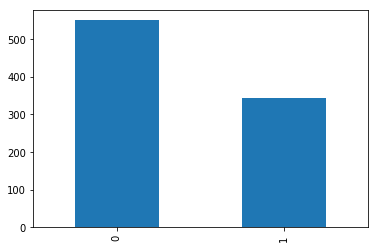

In [78]:
df.Survived.value_counts().plot(kind='bar')

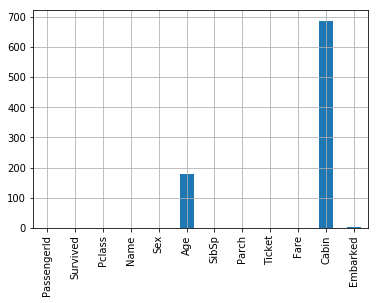

In [80]:
df.isnull().sum().plot(kind='bar')

#### How to deal with missing value?

#### drop them or fill them with some values

In [81]:
df1=df.drop('Cabin',axis=1) 

In [82]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [83]:
df1.shape

(891, 11)

In [84]:
#把age是NA的都填成20
df1['Age']=df1['Age'].fillna(20)

In [85]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [86]:
#选出Embarked为非空的
df2=df1[df1['Embarked'].notnull()]

In [87]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [89]:
# missing value removal
# assign填值
df3=df.drop('Cabin',axis=1).assign(Age=lambda x : x['Age'].fillna(20))
df3=df3.loc[df3['Embarked'].notnull()]

In [91]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,20.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [92]:
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [93]:
df1.loc[10:14,['Name','Sex','Survived']]

,Name,Sex,Survived
10,"Sandstrom, Miss. Marguerite Rut",female,1
11,"Bonnell, Miss. Elizabeth",female,1
12,"Saundercock, Mr. William Henry",male,0
13,"Andersson, Mr. Anders Johan",male,0
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,0


In [94]:
df3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [96]:
#做一个表
df3.pivot_table(values='PassengerId',index='Survived',columns='Sex',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,231,109


In [98]:
df4=df3.loc[df3['Survived']==1]
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,20.00,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,20.00,0,0,2649,7.2250,C


In [99]:
df4.shape

(340, 11)

In [101]:
df3=df1.loc[df1['Age']>30]
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,S


In [102]:
df3.shape

(305, 11)

In [106]:
#outer df2和df3里有的都出现
df4=df2[['PassengerId','Age']].merge(df3[['PassengerId','Age']],on='PassengerId',how='outer')
df

,PassengerId,Age_x,Age_y
0,1,22.0,NaN
1,2,38.0,38.0
2,3,26.0,NaN
3,4,35.0,35.0
4,5,35.0,35.0
5,6,20.0,NaN
6,7,54.0,54.0
7,8,2.0,NaN
8,9,27.0,NaN
9,10,14.0,NaN


In [107]:
df4 = df2[['PassengerId', 'Name']].merge(df3[['PassengerId', 'Age']], on='PassengerId', how='outer')
df4.shape

(891, 3)

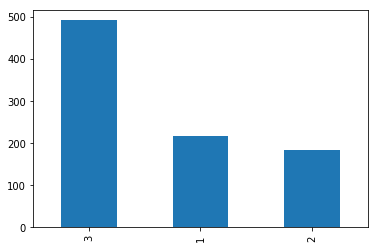

In [109]:
df['Pclass'].value_counts().plot.bar()

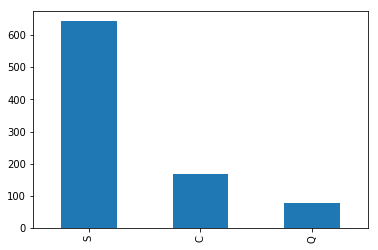

In [110]:
df['Embarked'].value_counts().plot.bar()

In [111]:
df['Survived'].corr(df['Pclass'])

-0.33848103596101475

In [112]:
df['Survived'].corr(df['Age'])

-0.07722109457217764

### Index Objects

In [6]:
s=pd.Series([1,2,3,4,5,6],index=pd.date_range('20170102',periods=6))
s

2017-01-02    1
2017-01-03    2
2017-01-04    3
2017-01-05    4
2017-01-06    5
2017-01-07    6
Freq: D, dtype: int64

In [7]:
s.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [8]:
s.index[2]

Timestamp('2017-01-04 00:00:00', freq='D')

In [9]:
s.index[2:]

DatetimeIndex(['2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07'], dtype='datetime64[ns]', freq='D')

### Reindex

In [11]:
np.random.randn(1,4).tolist()

[[-0.08434553268984157,
  -0.325999645665862,
  -1.8168613828678633,
  1.0782343439060995]]

In [25]:
s1=pd.Series(np.random.randn(1,4).tolist()[0],index=['A','B','C','D'])

Exception: Data must be 1-dimensional

In [20]:
s2=s1.reindex(['A','B','C','D','E','F','G'])
s2

A   -1.008743
B   -0.589534
C    0.919650
D   -0.882267
E         NaN
F         NaN
G         NaN
dtype: float64

In [21]:
s2=s1.reindex(['A','B','C','D','E','F','G'],fill_value=0) 
s2

A   -1.008743
B   -0.589534
C    0.919650
D   -0.882267
E    0.000000
F    0.000000
G    0.000000
dtype: float64

In [26]:
df = pd.DataFrame(np.random.randn(4, 4), index = ['r1','r2','r3','r4'], columns=['c1','c2','c3','c4'])
df

,c1,c2,c3,c4
r1,0.070460,0.369385,-0.096027,0.969645
r2,0.362428,0.149996,-0.361944,-0.250637
r3,-1.534624,-0.209538,-0.392937,-0.030377
r4,-0.258563,0.792980,1.896630,-0.300522


In [28]:
df.reindex(index=['r1','r2','r3','r6','r4','r5'])

,c1,c2,c3,c4
r1,0.070460,0.369385,-0.096027,0.969645
r2,0.362428,0.149996,-0.361944,-0.250637
r3,-1.534624,-0.209538,-0.392937,-0.030377
r6,NaN,NaN,NaN,NaN
r4,-0.258563,0.792980,1.896630,-0.300522
r5,NaN,NaN,NaN,NaN


In [29]:
df.reindex(columns=['c1','c2','c3','c4','c5'])

,c1,c2,c3,c4,c5
r1,0.070460,0.369385,-0.096027,0.969645,NaN
r2,0.362428,0.149996,-0.361944,-0.250637,NaN
r3,-1.534624,-0.209538,-0.392937,-0.030377,NaN
r4,-0.258563,0.792980,1.896630,-0.300522,NaN


### Drop Data

In [31]:
s1=pd.Series(np.arange(5),index=[1,2,3,4,5])
s1

1    0
2    1
3    2
4    3
5    4
dtype: int64

In [32]:
#把index是4的一行删掉
s1.drop(4)

1    0
2    1
3    2
5    4
dtype: int64

In [34]:
df1 = pd.DataFrame(np.random.randn(4, 4), index = ['r1','r2','r3','r4'], columns=['c1','c2','c3','c4'])
df1

,c1,c2,c3,c4
r1,0.118200,-0.177990,-0.330445,0.583028
r2,1.277948,0.029662,1.540294,-0.623019
r3,-1.696756,-1.023180,-1.163033,-1.339436
r4,0.768992,-1.237009,-0.048044,-0.504304


In [35]:
df1.drop('r1')

,c1,c2,c3,c4
r2,1.277948,0.029662,1.540294,-0.623019
r3,-1.696756,-1.023180,-1.163033,-1.339436
r4,0.768992,-1.237009,-0.048044,-0.504304


In [36]:
df1.drop('c4',axis=1)

,c1,c2,c3
r1,0.118200,-0.177990,-0.330445
r2,1.277948,0.029662,1.540294
r3,-1.696756,-1.023180,-1.163033
r4,0.768992,-1.237009,-0.048044


In [38]:
#inplace=True会彻底把c4从表中drop掉
df1.drop('c4',axis=1,inplace=True)

In [39]:
df1

,c1,c2,c3
r1,0.118200,-0.177990,-0.330445
r2,1.277948,0.029662,1.540294
r3,-1.696756,-1.023180,-1.163033
r4,0.768992,-1.237009,-0.048044


### Slice Data

In [3]:
s1 = pd.Series(np.arange(5),index=['A','B','C','D','E'])
s1

A    0
B    1
C    2
D    3
E    4
dtype: int64

In [5]:
s2=s1[:3] 
s2

A    0
B    1
C    2
dtype: int64

In [11]:
s2.loc['A']=2018 
s2

A    2018
B       1
C       2
dtype: int64

In [13]:
s1[['A','B','C']]

A    2018
B       1
C       2
dtype: int64

In [14]:
s1[0:3]

A    2018
B       1
C       2
dtype: int64

In [15]:
s1[s1>2 ]

A    2018
D       3
E       4
dtype: int64

In [17]:
s1[s1>3] = 10
s1

A    10
B     1
C     2
D     3
E    10
dtype: int64

In [19]:
s1[(s1>2)&(s1<5)]

D    3
dtype: int64

In [21]:
s1[(s1>2)&(s1<5)]=6 
s1

A    10
B     1
C     2
D     6
E    10
dtype: int64

In [22]:
df1 = pd.DataFrame(np.random.randn(4,5),index=['r1','r2','r3','r4'],columns=['c1','c2','c3','c4','c5'])
df1

,c1,c2,c3,c4,c5
r1,0.341370,-0.836624,0.459124,0.025136,0.242570
r2,0.978242,1.076491,-1.459199,1.707778,0.708619
r3,1.266616,-1.075244,3.072158,-0.469491,-0.707685
r4,-0.714607,-0.270585,0.223699,0.722713,0.836190


In [23]:
df1['c1']

r1    0.341370
r2    0.978242
r3    1.266616
r4   -0.714607
Name: c1, dtype: float64

In [24]:
df1[['c1','c4','c3']]

,c1,c4,c3
r1,0.341370,0.025136,0.459124
r2,0.978242,1.707778,-1.459199
r3,1.266616,-0.469491,3.072158
r4,-0.714607,0.722713,0.223699


In [25]:
df1[df1['c2']>0]

,c1,c2,c3,c4,c5
r2,0.978242,1.076491,-1.459199,1.707778,0.708619


In [26]:
df1<0

,c1,c2,c3,c4,c5
r1,False,True,False,False,False
r2,False,False,True,False,False
r3,False,True,False,True,True
r4,True,True,False,False,False


In [27]:
#ix 表示现在index里面找如果没有就按位置选取
df1.ix['r2']

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


c1    0.978242
c2    1.076491
c3   -1.459199
c4    1.707778
c5    0.708619
Name: r2, dtype: float64

In [28]:
df1.iloc[1]

c1    0.978242
c2    1.076491
c3   -1.459199
c4    1.707778
c5    0.708619
Name: r2, dtype: float64

In [29]:
df1.loc['r2']

c1    0.978242
c2    1.076491
c3   -1.459199
c4    1.707778
c5    0.708619
Name: r2, dtype: float64

In [30]:
#[0,2,3]选行，【2，3】选列
df1.iloc[[0,2,3],[2,3]]

,c3,c4
r1,0.459124,0.025136
r3,3.072158,-0.469491
r4,0.223699,0.722713


In [31]:
df2 = df1.copy()
df2['c6'] = ['one', 'one','two','three']

In [32]:
df2

,c1,c2,c3,c4,c5,c6
r1,0.341370,-0.836624,0.459124,0.025136,0.242570,one
r2,0.978242,1.076491,-1.459199,1.707778,0.708619,one
r3,1.266616,-1.075244,3.072158,-0.469491,-0.707685,two
r4,-0.714607,-0.270585,0.223699,0.722713,0.836190,three


In [33]:
#看c6里面是不是有two，three，返回的是TorF
df2['c6'].isin(['two','three'])

r1    False
r2    False
r3     True
r4     True
Name: c6, dtype: bool

In [34]:
df2[df2['c6'].isin(['two','three'])]

,c1,c2,c3,c4,c5,c6
r3,1.266616,-1.075244,3.072158,-0.469491,-0.707685,two
r4,-0.714607,-0.270585,0.223699,0.722713,0.836190,three


### Data Alignment

In [35]:
s1 = pd.Series(np.arange(5),index=['A','B','C','D','E'])
s1

A    0
B    1
C    2
D    3
E    4
dtype: int64

In [36]:
s2 = pd.Series(np.arange(3),index=['A','B','C'])
s2

A    0
B    1
C    2
dtype: int64

In [37]:
s1+s2

A    0.0
B    2.0
C    4.0
D    NaN
E    NaN
dtype: float64

In [38]:
df1 = pd.DataFrame(np.random.randn(4,5),index=['r1','r2','r3','r4'],columns=['c1','c2','c3','c4','c5'])
df1

,c1,c2,c3,c4,c5
r1,-0.975559,-1.595209,1.499408,-1.942687,0.119202
r2,1.950545,0.645125,0.987659,0.485037,1.214339
r3,-1.500427,-1.946438,-0.966988,-1.618907,-0.414625
r4,0.368880,-0.641440,0.090038,-0.364735,0.421739


In [39]:
df2 = pd.DataFrame(np.random.randn(3,4),index=['r1','r2','r3'],columns=['c1','c2','c3','c4'])
df2

,c1,c2,c3,c4
r1,-0.174292,1.923898,-0.314566,-2.559102
r2,-0.469366,0.900652,1.935718,-1.297123
r3,-0.613435,1.860959,-1.083924,-0.482745


In [40]:
df1+df2

,c1,c2,c3,c4,c5
r1,-1.149851,0.328690,1.184842,-4.501788,NaN
r2,1.481179,1.545777,2.923377,-0.812087,NaN
r3,-2.113862,-0.085479,-2.050912,-2.101652,NaN
r4,NaN,NaN,NaN,NaN,NaN


In [41]:
# use value（NaN）=fill_value+df1
df1.add(df2,fill_value=20) 

,c1,c2,c3,c4,c5
r1,-1.149851,0.328690,1.184842,-4.501788,20.119202
r2,1.481179,1.545777,2.923377,-0.812087,21.214339
r3,-2.113862,-0.085479,-2.050912,-2.101652,19.585375
r4,20.368880,19.358560,20.090038,19.635265,20.421739


In [42]:
s3 = df1.ix[0]  # select first row
s3

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


c1   -0.975559
c2   -1.595209
c3    1.499408
c4   -1.942687
c5    0.119202
Name: r1, dtype: float64

In [43]:
df2-s3

,c1,c2,c3,c4,c5
r1,0.801267,3.519107,-1.813975,-0.616415,NaN
r2,0.506193,2.495860,0.436309,0.645563,NaN
r3,0.362124,3.456168,-2.583332,1.459942,NaN
